# BIOS512 Final Project: Comparing Characteristics of Vinho Verde Wine Samples
### Katherine Xing 

**Due date: Saturday, December 9th**

It would hardly be an exaggeration to claim that wine is one of the most central beverages and globally recognized cultural symbols that has existed throughout mankind; the alcoholic drink being an allegory for romance, wisdom, luxury, and more. Nowadays, a glass of wine (or two) makes its way onto more than 118 million dinner tables in US households every year. It is brought to dinner parties, toasted at celebrations, and fits in at almost every occasion. This project will compare not only the differences between red and white wine, but how those differences in compounds affect consumer taste preferences (as assessed by the average quality scores). 

*Data for this project was pulled from [Cortez et. al (2009)](https://www.semanticscholar.org/paper/Modeling-wine-preferences-by-data-mining-from-Cortez-Cerdeira/bf15a0ccc14ac1deb5cea570c870389c16be019c).*

The first two visualizations are meant to give us an overview of the data, while the following figures will provide a more in-depth analysis of the properties and differences between red and white wine. We will first select a few choice physiochemical properties and look at their average values in red and white wines. We are also interested in determining the frequency of quality ratings between the two types of wines, and we can do so using a histogram, seeing as quality scores are discrete values. 

In [9]:
#Reading in necessary libraries 
library('tidyverse') 

#Reading in the two datasets
red = read.delim('https://raw.githubusercontent.com/kxing1485/BIOS512_assignments/main/winequality-red.csv', sep = ';')
white = read.delim('https://raw.githubusercontent.com/kxing1485/BIOS512_assignments/main/winequality-white.csv', sep = ';')

#Adding a column in each dataset to specify whether the wine is white or red before merge
red$color = 'RED'
white$color = 'WHITE'

#Merging the datasets together 
data = rbind(red, white)

In [191]:
#summary table with select list of interesting chemical properties. 
summary_data = data |>
    group_by(color) |> 
    summarize(count = n(), fixed.acidity = round(mean(fixed.acidity), 2), sulphates = round(mean(sulphates), 2), 
    density = round(mean(density), 2), pH = round(mean(pH), 2), alcohol = round(mean(alcohol), 2), quality = round(mean(quality), 2))

summary_data

color,count,fixed.acidity,sulphates,density,pH,alcohol,quality
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RED,1599,8.32,0.66,1.00,3.31,10.42,5.64
WHITE,4898,6.85,0.49,0.99,3.19,10.51,5.88


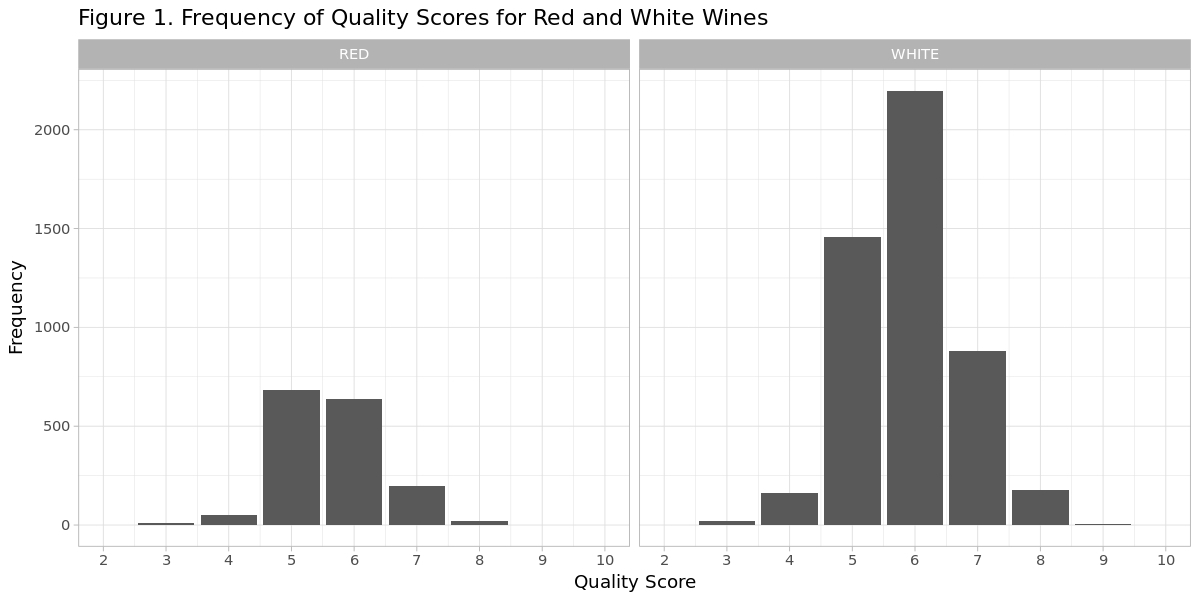

In [130]:
#Frequency of quality scores given for red and white wine samples
options(repr.plot.width=10, repr.plot.height=5)

quality = ggplot(data, aes(quality)) +  
    geom_bar() + facet_wrap(~color) + 
    labs(y = 'Frequency') +
    scale_x_continuous(name ="Quality Score", breaks=c(2,3,4,5,6,7,8,9,10), limits=c(2,10)) + 
    theme_light() + 
    ggtitle('Figure 1. Frequency of Quality Scores for Red and White Wines')
quality

`geom_smooth()` using formula = 'y ~ x'


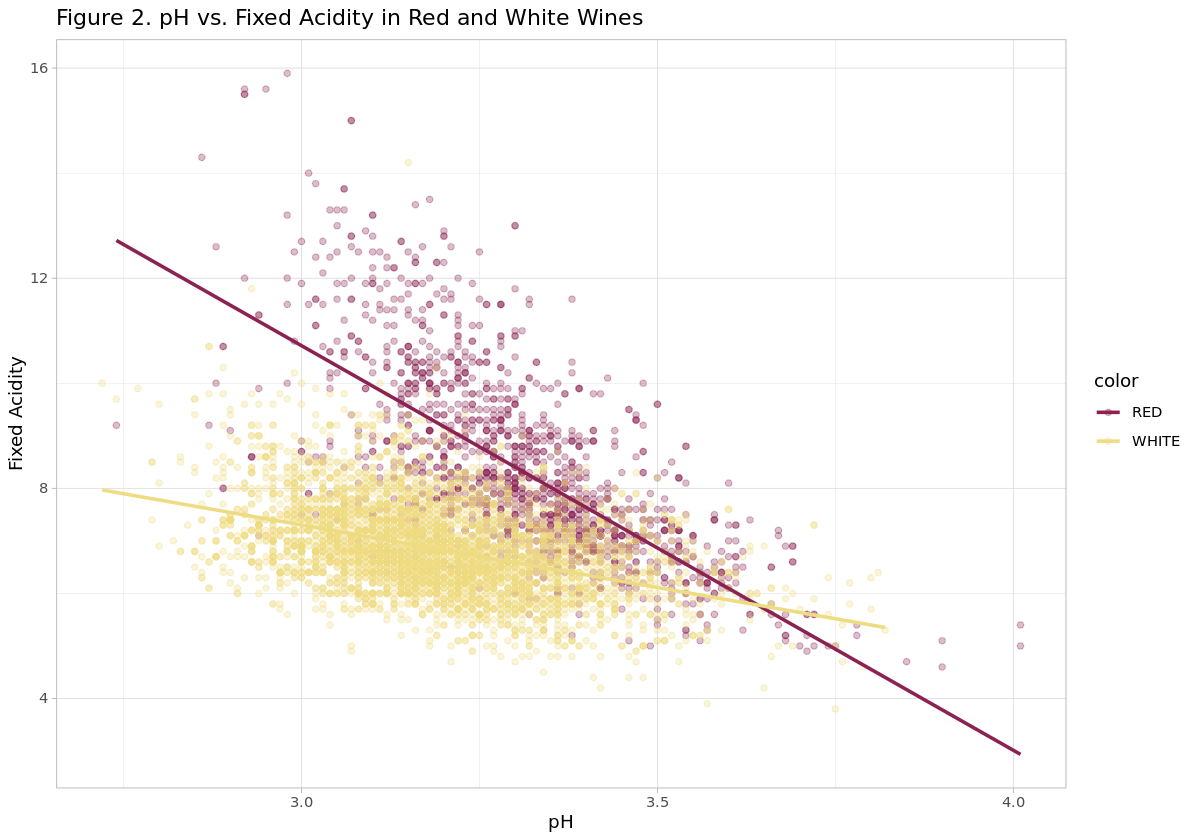

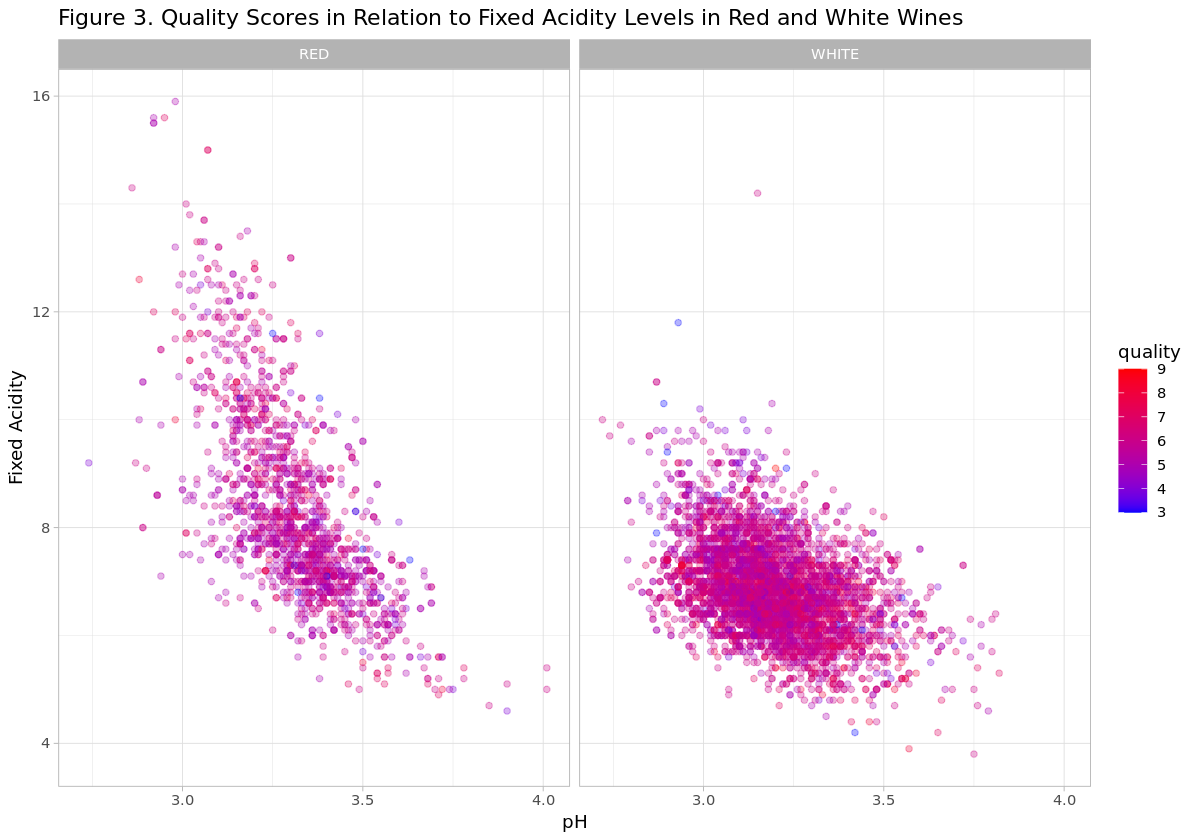

In [189]:
#Comparing differences in fixed acidity between red and white wines
#Also determining quality scores in relation to acidity

options(repr.plot.width=10, repr.plot.height=7)

fixed_acidity = ggplot(data, aes(x = pH, y = fixed.acidity, color = color)) +  
    geom_point(alpha=0.3) +
    labs(y = 'Fixed Acidity') +
    theme_light() + 
    geom_smooth(method='lm', se=FALSE) + 
    scale_color_manual(values = c('violetred4', 'lightgoldenrod2')) + 
    ggtitle('Figure 2. pH vs. Fixed Acidity in Red and White Wines')

volatile_acidity = ggplot(data, aes(x = pH, y = fixed.acidity, color = quality)) +  
    geom_point(alpha=0.3) + facet_wrap(~color) +
    labs(y = 'Fixed Acidity') +
    scale_color_gradient(low="blue", high="red") + theme_light()+
    ggtitle('Figure 3. Quality Scores in Relation to Fixed Acidity Levels in Red and White Wines')

fixed_acidity 
volatile_acidity

No summary function supplied, defaulting to `mean_se()`


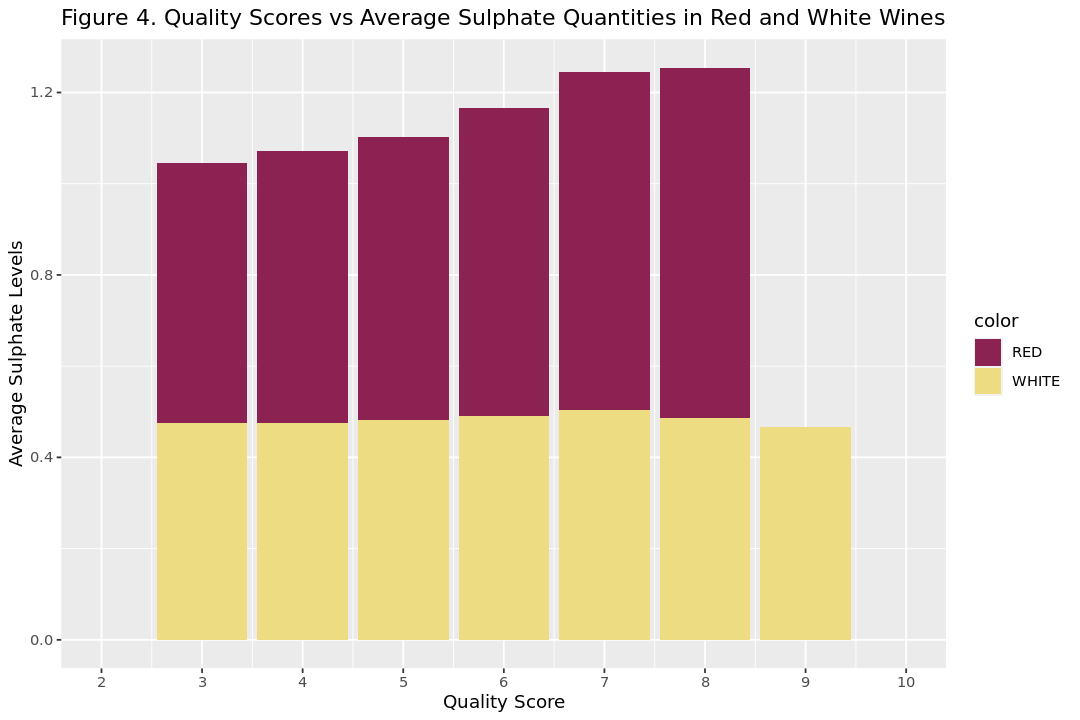

In [188]:
#Modeling relationship between sulphates and quality scores in red and white wine
colors = c('violetred4', 'lightgoldenrod2')

options(repr.plot.width = 9, repr.plot.height = 6)

sulphates = ggplot(data) +  
    geom_bar(aes(x=quality, y=sulphates, fill=color), stat = "summary") +
    labs(y = 'Average Sulphate Levels') + theme_gray() +
    scale_x_continuous(name ="Quality Score", breaks=c(2,3,4,5,6,7,8,9,10), limits=c(2,10)) + 
    scale_fill_manual(values = colors) + 
    ggtitle('Figure 4. Quality Scores vs Average Sulphate Quantities in Red and White Wines') 
sulphates

Below are the main takeaways from this analysis: 
* **Figure 1.** Most red wines were given a quality score or 5, whereas white wines are most commonly rated at 6.
* **Figure 2.** Fixed acidity has a weak negative linear association with pH for both red and white wines. This follows intuitively as weaker acids have higher pH's. Overall, it appears that pH for red wine samples had greater variation and decreased more rapidly than the white wine samples.  
* **Figure 3.** On average, quality scores appeared to be most concentrated in the 4-6 range for both red and white wines. There were no immediately visible trends in quality score, although some darker circles indicating lower quality scores were more prominent in the outer edges of the red wine scatterplot. 
* **Figure 4.** Average white wine sulphate levels appeared to be generally similar, with the highest sulphate levels garnering a quality score of 7. There was much more of a marked difference in the quality score vs. average sulphate levels of red wines; it appears that the higher the quality score, the higher the sulphate level. 

From Figure 1, it appears that the most red wines were given a quality score or 5, whereas white wines are most commonly rated at 6. In general, it seems that it is much more difficult to discern physiochemical property trends for white wines than red wines. Acidity level did not seem to affect quality score as much as sulphate levels did. Future analysis could include looking at other physiochemical properties that were not assessed in this project. 